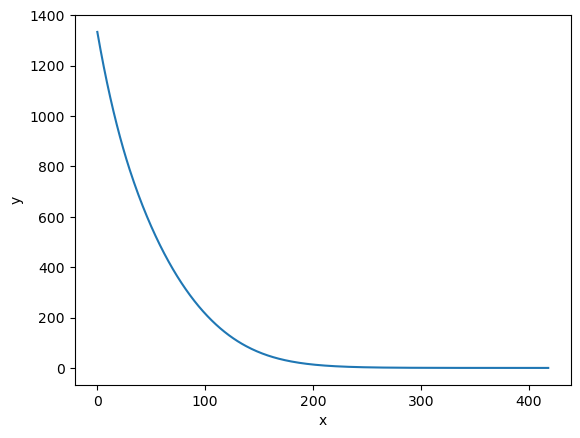

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display


x_list = []
y_list = []

def paintloss(loss,it):
    x_list.append(it)
    y_list.append(loss)
    display.clear_output(wait=True)
    plt.plot(x_list, y_list)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    #plt.pause(0.1)    
    
    
N,Din,H,Dout = 128,1000,100,10
x = torch.randn(N,Din)
y = torch.randn(N,Dout)
class TwoLayerNet(torch.nn.Module):
    def __init__(self,Din,H,Dout):
        super(TwoLayerNet,self).__init__()
        self.linear1 = torch.nn.Linear(Din,H)
        self.linear2 = torch.nn.Linear(H,Dout)
    def forward(self,x):
        y_pred = self.linear2(self.linear1(x).clamp(min=0))
        return y_pred
                              
model = TwoLayerNet(Din,H,Dout)
loss_fn = nn.MSELoss(reduction = 'sum')
learning_rate =1e-4
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
                              
for it in range(500):
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        
        paintloss(loss.item(),it)
        optimizer.zero_grad()
        #print(it,loss.item())
        loss.backward()
        optimizer.step()
